In [1]:
import pandas as pd

Теперь задача. В этот раз никаких такси и товаров, потренируемся на характеристиках покемонов! В исходном датасете мультииндексов нет, поэтому будем создавать их сами. Данные сохранены в переменную pokemon.
Сначала измените названия исходных столбцов:

пробелы и точки нужно заменить на "_" (напр. Sp. Atk --> sp_atk).
приведите все названия к нижнему регистру
колонку "#" переименовать в "id"
Полученные результаты запишите в исходный датафрейм pokemon.

Затем сгруппируйте данные по поколению покемонов (generation), и с помощью value_counts() посчитайте, сколько в каком поколении легендарных покемонов (legendary). Полученный объект приведите к формату датафрейма (.to_frame()) и сохраните в legends.


In [2]:
pokemon = pd.read_csv('https://stepik.org/media/attachments/lesson/363874/Pokemon.csv')

In [8]:
pokemon.rename(columns= lambda x: x.replace('. ', '_').replace(' ', '_').lower(), inplace = True)

In [9]:
pokemon.rename(columns = {'#':'id'}, inplace = True)

In [11]:
legends = pokemon.groupby('generation') \
    .legendary \
    .value_counts() \
    .to_frame()
legends

legendary
generation legendary           
1          False            160
           True               6
2          False            101
           True               5
3          False            142
           True              18
4          False            108
           True              13
5          False            150
           True              15
6          False             74
           True               8

 Как вы могли заметить,  есть только одна колонка со значениями, которая называется legendary, а в качестве индекса используются две колонки — generation и legendary. Два одинаковых названия — не очень хорошо, поэтому необходимо переименовать колонку legendary в legendary_count. 

Используйте датафрейм legends, полученный на предыдущем шаге, и измените в нём название столбца, перезаписав его в ту же переменную. 
Затем используйте unstack, чтобы поместить уровень индекса legendary в уровень оси столбцов. Иными словами, должно получиться две колонки – False & True. Результат сохраните в legends_unstacked.

Пример ожидаемого формата названия колонок:
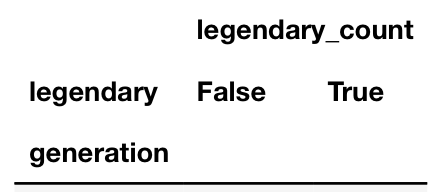


In [12]:
legends.rename(columns = {'legendary':'legendary_count'}, inplace = True)

In [14]:
legends_unstacked = legends.unstack()
legends_unstacked

legendary_count      
legendary            False True 
generation                      
1                      160     6
2                      101     5
3                      142    18
4                      108    13
5                      150    15
6                       74     8

Немного усложним задачу. Теперь попробуем узнать, среди каких типов покемонов и какого поколения больше всего легендарных.

Сгруппируйте датасет pokemon по переменным generation и type_1, посчитайте количество легендарных покемонов внутри групп. Приведите данные в формат датафрейма, а затем используйте unstack(). В качестве ответа выберите вид и поколение покемона, среди которых больше всего легендарных.

Hint: обратиться к колонке с мультииндексом можно с помощью .loc[:,('legendary', True)]

In [17]:
pokemon.groupby(['generation', 'type_1']) \
    .legendary \
    .value_counts() \
    .unstack() \
    .idxmax()

legendary
False     (1, Water)
True     (3, Dragon)
dtype: object

Преобразуйте представленные данные в длинный формат и запишите в переменную avocado_agg_long. В качестве индекса используйте type

In [18]:
avocado_agg = pd.DataFrame({'type' : ['conventional', 'organic'],
                            'AvgPrice_2015' : [1.077963, 1.673324],
                            'AvgPrice_2016' : [1.105595, 1.571684],
                            'AvgPrice_2017' : [1.294888, 1.735521],
                            'AvgPrice_2018' : [1.127886, 1.567176],
                            })
avocado_agg

,type,AvgPrice_2015,AvgPrice_2016,AvgPrice_2017,AvgPrice_2018
0,conventional,1.077963,1.105595,1.294888,1.127886
1,organic,1.673324,1.571684,1.735521,1.567176


In [21]:
avocado_agg_long = pd.wide_to_long(avocado_agg, stubnames = 'AvgPrice', i = 'type', sep = '_', j = 'year')
avocado_agg_long

,,AvgPrice
type,year,
conventional,2015,1.077963
organic,2015,1.673324
conventional,2016,1.105595
organic,2016,1.571684
conventional,2017,1.294888
organic,2017,1.735521
conventional,2018,1.127886
organic,2018,1.567176


⭐️ Имеется набор данных о супергероях в широком формате. В первой колонке Name находятся их имена, а остальные 167 столбцов — различные характеристики (суперсилы), принимающие значение либо True, либо False. Давайте преобразуем датафрейм так, чтобы "собрать" эти признаки в один столбец под названием superpower, а в качестве значений поместить туда списки имеющихся у того или иного героя суперсил. 

То есть привести в следующий формат:

           Name                                         superpower
568  Spider-Man  [Reflexes, Animal Oriented Powers, Danger Sens...
Сначала приведите данные к длинному формату, где единственным идентификатором будет имя героя Name. Новый столбец с названиями суперсил переименуйте в superpower. Полученный датафрейм запишите в superheroes_long.

Для того, чтобы соединить силы в списки и привести данные в желаемую форму, отфильтруйте колонку value так, чтобы остались строки только со значением True. Сгруппируйте датасет по Name, после чего возьмите столбец superpower и используйте .apply(list). Результат сохраните в superheroes_powers. Обратите внимание, что результирующий объект тоже должен быть датафреймом, а колонки должно быть всего две — Name и superpower.

Данные записаны в superheroes.

In [22]:
superheroes = pd.read_csv('https://stepik.org/media/attachments/lesson/363874/superheroes_power_matrix.csv')
superheroes

,Name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
superheroes_long = superheroes.melt(id_vars = ['Name'], var_name = 'superpower')
superheroes_powers = superheroes_long.query('value == True') \
    .groupby('Name') \
    .superpower \
    .apply(list) \
    .to_frame() \
    .reset_index()
superheroes_powers

,Name,superpower
0,3-D Man,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,[Lantern Power Ring]
4,Abomination,"[Accelerated Healing, Intelligence, Super Stre..."
...,...,...
662,Yellowjacket II,"[Flight, Energy Blasts, Size Changing]"
663,Ymir,"[Cold Resistance, Durability, Longevity, Super..."
664,Yoda,"[Agility, Stealth, Danger Sense, Marksmanship,..."
665,Zatanna,"[Cryokinesis, Telepathy, Magic, Fire Control, ..."


В следующих задачах мы будем работать сэмплом данных об аренде велосипедов в Чикаго:

Для начала, возьмем данные только за Q1, они уже сохранены в переменную bikes_Q1. Перед тем как сделать .resample(), нужно немного подготовить данные. Поместите колонку start_time в качестве индексов и сохраните изменения в исходный датасет. Предварительно проверьте тип переменной, и приведите её к правильному, если необходимо.

как привести к DateTime? документация + конспект
Данные за Q1 находятся в bikes_Q1.

In [37]:
bikes_Q1 = pd.read_csv('https://stepik.org/media/attachments/lesson/367415/bikes_q1_sample.csv')
bikes_Q1

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17617135,2018-01-22 20:04:31,2018-01-22 20:11:53,1131,442.0,471,Francisco Ave & Foster Ave,468,Budlong Woods Library,Subscriber,Female,1949.0
1,17897619,2018-03-16 19:47:59,2018-03-16 20:04:00,6146,961.0,296,Broadway & Belmont Ave,253,Winthrop Ave & Lawrence Ave,Subscriber,Male,1988.0
2,17881307,2018-03-14 18:49:20,2018-03-14 18:54:38,3847,318.0,260,Kedzie Ave & Milwaukee Ave,503,Drake Ave & Fullerton Ave,Subscriber,Male,1987.0
3,17881130,2018-03-14 18:33:48,2018-03-14 19:07:40,1483,"2,032.0",199,Wabash Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Male,1990.0
4,17686289,2018-02-05 17:39:14,2018-02-05 17:46:13,6391,419.0,596,Benson Ave & Church St,605,University Library (NU),Subscriber,Male,1992.0
...,...,...,...,...,...,...,...,...,...,...,...,...
174210,17792363,2018-02-28 17:16:53,2018-02-28 17:18:49,2401,116.0,50,Clark St & Congress Pkwy,41,Federal St & Polk St,Subscriber,Male,1991.0
174211,17695807,2018-02-08 11:52:44,2018-02-08 11:58:13,4687,329.0,18,Wacker Dr & Washington St,39,Wabash Ave & Adams St,Subscriber,Male,1979.0
174212,17938644,2018-03-22 17:18:21,2018-03-22 17:24:13,6200,352.0,59,Wabash Ave & Roosevelt Rd,50,Clark St & Congress Pkwy,Subscriber,Male,1968.0
174213,17738202,2018-02-20 16:45:07,2018-02-20 16:57:42,757,755.0,99,Lake Shore Dr & Ohio St,38,Clark St & Lake St,Subscriber,Male,1990.0


In [38]:
bikes_Q1[['start_time', 'end_time']] = bikes_Q1[['start_time', 'end_time']].apply(pd.to_datetime)
bikes_Q1.set_index('start_time', inplace = True)
bikes_Q1

,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
start_time,,,,,,,,,,,
2018-01-22 20:04:31,17617135,2018-01-22 20:11:53,1131,442.0,471,Francisco Ave & Foster Ave,468,Budlong Woods Library,Subscriber,Female,1949.0
2018-03-16 19:47:59,17897619,2018-03-16 20:04:00,6146,961.0,296,Broadway & Belmont Ave,253,Winthrop Ave & Lawrence Ave,Subscriber,Male,1988.0
2018-03-14 18:49:20,17881307,2018-03-14 18:54:38,3847,318.0,260,Kedzie Ave & Milwaukee Ave,503,Drake Ave & Fullerton Ave,Subscriber,Male,1987.0
2018-03-14 18:33:48,17881130,2018-03-14 19:07:40,1483,"2,032.0",199,Wabash Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Male,1990.0
2018-02-05 17:39:14,17686289,2018-02-05 17:46:13,6391,419.0,596,Benson Ave & Church St,605,University Library (NU),Subscriber,Male,1992.0
...,...,...,...,...,...,...,...,...,...,...,...
2018-02-28 17:16:53,17792363,2018-02-28 17:18:49,2401,116.0,50,Clark St & Congress Pkwy,41,Federal St & Polk St,Subscriber,Male,1991.0
2018-02-08 11:52:44,17695807,2018-02-08 11:58:13,4687,329.0,18,Wacker Dr & Washington St,39,Wabash Ave & Adams St,Subscriber,Male,1979.0
2018-03-22 17:18:21,17938644,2018-03-22 17:24:13,6200,352.0,59,Wabash Ave & Roosevelt Rd,50,Clark St & Congress Pkwy,Subscriber,Male,1968.0


В данных имеется как дата аренды, так и её точное время начала и окончания с точностью до секунд. Примените метод pd.resample() и агрегируйте данные по дням. В качестве ответа укажите максимальное число аренд за день.

In [40]:
bikes_Q1.resample('1d').trip_id.count().max()

4196

Посмотрим на распределение количества аренд для разных групп пользователей (usertype) — customers и subscribers в данных за апрель. Данные за нужный период можно подгрузить отсюда.

Сделайте ресемпл по дням для каждой группы и в качестве ответа укажите число аренд за 18 апреля, сделанных пользователями типа Subscriber.

Может пригодиться:

функция для транспонирования .T

In [45]:
new_bikes_data = pd.read_csv('https://stepik.org/media/attachments/lesson/367415/bikes_april.csv', 
                             parse_dates = ['start_time', 'end_time'])
new_bikes_data

,start_time,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2018-04-01 00:10:23,18000531,2018-04-01 00:22:12,5065,709.0,228,Damen Ave & Melrose Ave,219,Damen Ave & Cortland St,Subscriber,Male,1983.0
1,2018-04-01 00:15:49,18000533,2018-04-01 00:19:47,4570,238.0,128,Damen Ave & Chicago Ave,130,Damen Ave & Division St,Subscriber,Male,1978.0
2,2018-04-01 00:17:00,18000534,2018-04-01 00:22:53,1323,353.0,130,Damen Ave & Division St,69,Damen Ave & Pierce Ave,Subscriber,Male,1991.0
3,2018-04-01 00:20:00,18000536,2018-04-01 00:26:22,2602,382.0,121,Blackstone Ave & Hyde Park Blvd,351,Cottage Grove Ave & 51st St,Subscriber,Female,1992.0
4,2018-04-01 00:23:19,18000538,2018-04-01 00:35:01,4213,702.0,31,Franklin St & Chicago Ave,180,Ritchie Ct & Banks St,Subscriber,Male,1985.0
...,...,...,...,...,...,...,...,...,...,...,...,...
90139,2018-04-30 23:51:32,18241104,2018-04-30 23:53:50,3529,138.0,140,Dearborn Pkwy & Delaware Pl,176,Clark St & Elm St,Subscriber,Male,1983.0
90140,2018-04-30 23:52:19,18241105,2018-05-01 00:11:53,3274,"1,174.0",176,Clark St & Elm St,374,Western Ave & Walton St,Subscriber,Female,1991.0
90141,2018-04-30 23:58:00,18241110,2018-05-01 00:25:46,5964,"1,666.0",176,Clark St & Elm St,128,Damen Ave & Chicago Ave,Subscriber,Female,1996.0
90142,2018-04-30 23:58:04,18241111,2018-05-01 00:07:00,331,536.0,240,Sheridan Rd & Irving Park Rd,115,Sheffield Ave & Wellington Ave,Subscriber,Male,1985.0


In [47]:
new_bikes_data.set_index('start_time', inplace = True)

In [50]:
bikes_day_count = new_bikes_data.groupby('usertype') \
    .trip_id \
    .resample('1d') \
    .count()
bikes_day_count

usertype    start_time
Customer    2018-04-01     239
            2018-04-02     166
            2018-04-03      31
            2018-04-04      82
            2018-04-05      90
            2018-04-06     124
            2018-04-07     335
            2018-04-08     242
            2018-04-09      39
            2018-04-10     117
            2018-04-11     305
            2018-04-12     491
            2018-04-13     208
            2018-04-14      41
            2018-04-15      41
            2018-04-16      40
            2018-04-17     121
            2018-04-18      45
            2018-04-19     164
            2018-04-20     562
            2018-04-21     655
            2018-04-22    1055
            2018-04-23     345
            2018-04-24     367
            2018-04-25     220
            2018-04-26     544
            2018-04-27     416
            2018-04-28     713
            2018-04-29    1082
            2018-04-30    1098
Subscriber  2018-04-01     825
            2018

In [53]:
bikes_day_count.loc[('Subscriber','2018-04-18')]
# мой вариант
# bikes_day_count.to_frame().query('usertype == "Subscriber" and start_time == "2018-04-18"')

2196

⭐️ Посмотрим на данные за период с апреля по декабрь.

Объедините сэмплы данных за нужные месяцы в один общий датасет bikes. Сделайте преобразование по дням для каждой группы пользователей (usertype), затем выберите дни, в которые число аренд, сделанных customers, было больше, чем у subscribers.

Данные за 

Q2: (1) апрель, (2) май, (3) июнь
Q3: (4) июль, (5) август, (6) сентябрь
Q4: (7) октябрь, (8) ноябрь, (9) декабрь
Note: объединение данных может занять немного времени, don't worry

In [63]:
links = [
    "https://stepik.org/media/attachments/lesson/367415/bikes_q2_sample_apr.csv",
    "https://stepik.org/media/attachments/lesson/367415/bikes_q2_sample_may.csv",
    "https://stepik.org/media/attachments/lesson/367415/bikes_q2_sample_jun.csv",
    "https://stepik.org/media/attachments/lesson/367415/bikes_q3_sample_july.csv",
    "https://stepik.org/media/attachments/lesson/367415/bikes_q3_sample_aug.csv",
    "https://stepik.org/media/attachments/lesson/367415/bikes_q3_sample_sep.csv",
    "https://stepik.org/media/attachments/lesson/367415/bikes_q4_sample_oct.csv",
    "https://stepik.org/media/attachments/lesson/367415/bikes_q4_sample_nov.csv",
    "https://stepik.org/media/attachments/lesson/367415/bikes_q4_sample_dec.csv"
]

In [64]:
bikes = []
for link in links:
    df = pd.read_csv(link)
    bikes.append(df)

In [65]:
bikes = pd.concat(bikes)
bikes

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,18000534,2018-04-01 00:17:00,2018-04-01 00:22:53,1323,353.0,130,Damen Ave & Division St,69,Damen Ave & Pierce Ave,Subscriber,Male,1991.0
1,18000536,2018-04-01 00:20:00,2018-04-01 00:26:22,2602,382.0,121,Blackstone Ave & Hyde Park Blvd,351,Cottage Grove Ave & 51st St,Subscriber,Female,1992.0
2,18000538,2018-04-01 00:23:19,2018-04-01 00:35:01,4213,702.0,31,Franklin St & Chicago Ave,180,Ritchie Ct & Banks St,Subscriber,Male,1985.0
3,18000540,2018-04-01 00:24:46,2018-04-01 00:44:23,6401,"1,177.0",596,Benson Ave & Church St,517,Clark St & Jarvis Ave,Subscriber,Male,1974.0
4,18000541,2018-04-01 00:26:04,2018-04-01 00:31:05,6333,301.0,145,Mies van der Rohe Way & Chestnut St,24,Fairbanks Ct & Grand Ave,Subscriber,Male,1984.0
...,...,...,...,...,...,...,...,...,...,...,...,...
38505,21742433,2018-12-31 23:40:12,2018-12-31 23:47:41,6312,449.0,42,Wabash Ave & Cermak Rd,193,State St & 29th St,Subscriber,Male,1992.0
38506,21742436,2018-12-31 23:42:07,2018-12-31 23:50:58,4620,531.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Male,1989.0
38507,21742437,2018-12-31 23:45:13,2018-12-31 23:50:05,246,292.0,49,Dearborn St & Monroe St,164,Franklin St & Lake St,Subscriber,Male,1984.0
38508,21742439,2018-12-31 23:48:48,2018-12-31 23:57:22,4386,514.0,624,Dearborn St & Van Buren St (*),44,State St & Randolph St,Subscriber,Female,1990.0


In [67]:
bikes[['start_time', 'end_time']] = bikes[['start_time', 'end_time']].apply(pd.to_datetime)
bikes.set_index('start_time', inplace = True)

In [69]:
day_bikes_count = bikes.groupby('usertype') \
    .trip_id \
    .resample('1d') \
    .count()

In [72]:
user_groups = day_bikes_count.unstack(level = 'usertype')
(user_groups.Customer > user_groups.Subscriber).to_frame(name = 'More_cust_than_subs').query('More_cust_than_subs == True')

,More_cust_than_subs
start_time,
2018-05-27,True
2018-09-02,True


Отлично! Следующий шаг – более подробно посмотреть на летний период.

Еще один плюс использования дат в качестве индексов – возможность выбрать данные за интересующий нас промежуток времени. В переменную bikes_summer сохраните наблюдения с 1 июня по 31 августа. Затем запишите в top_destination наиболее популярный пункт назначения. Агрегируйте данные по дням и определите, в какой день в полученный пункт (top_destination) было совершено меньше всего поездок. Дату сохраните в bad_day, отформатировав timestamp с помощью .strftime('%Y-%m-%d').

Могут пригодиться:

loc
strftime
idxmin, idxmax
size
query
Полный датафрейм уже сохранен как bikes, еще раз объединять данные в этом степе не нужно :) В качестве индексов используется start_time в нужном формате.

In [79]:
bikes_summer = bikes.loc['2018-06-01':'2018-08-31']
bikes_summer

,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
start_time,,,,,,,,,,,
2018-06-01 00:04:40,18709077,2018-06-01 00:06:47,3155,127.0,128,Damen Ave & Chicago Ave,214,Damen Ave & Grand Ave,Subscriber,Female,1978.0
2018-06-01 00:06:08,18709080,2018-06-01 00:24:18,2807,"1,090.0",258,Logan Blvd & Elston Ave,69,Damen Ave & Pierce Ave,Customer,NaN,NaN
2018-06-01 00:08:01,18709086,2018-06-01 00:32:55,2737,"1,494.0",337,Clark St & Chicago Ave,225,Halsted St & Dickens Ave,Customer,Male,1988.0
2018-06-01 00:09:02,18709091,2018-06-01 00:19:21,6089,619.0,210,Ashland Ave & Division St,56,Desplaines St & Kinzie St,Subscriber,Male,1987.0
2018-06-01 00:09:28,18709092,2018-06-01 00:14:44,2352,316.0,240,Sheridan Rd & Irving Park Rd,303,Broadway & Cornelia Ave,Subscriber,Male,1997.0
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 23:49:34,20479557,2018-08-31 23:56:20,4289,406.0,374,Western Ave & Walton St,69,Damen Ave & Pierce Ave,Subscriber,Male,1987.0
2018-08-31 23:49:56,20479559,2018-09-01 00:30:37,6337,"2,441.0",497,Kimball Ave & Belmont Ave,599,Valli Produce - Evanston Plaza,Subscriber,Male,1989.0
2018-08-31 23:50:01,20479560,2018-08-31 23:58:00,1429,479.0,113,Bissell St & Armitage Ave,16,Paulina Ave & North Ave,Subscriber,Male,1987.0


In [80]:
top_destination = bikes_summer.to_station_name.value_counts().idxmax()
top_destination

'Streeter Dr & Grand Ave'

In [82]:
top_destination_bikes = bikes_summer.query('to_station_name == @top_destination')
top_destination_bikes

,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
start_time,,,,,,,,,,,
2018-06-01 07:04:44,18710193,2018-06-01 07:24:39,4421,"1,195.0",192,Canal St & Adams St,35,Streeter Dr & Grand Ave,Subscriber,Male,1960.0
2018-06-01 07:25:37,18710624,2018-06-01 07:32:31,961,414.0,25,Michigan Ave & Pearson St,35,Streeter Dr & Grand Ave,Subscriber,Male,1987.0
2018-06-01 07:25:44,18710627,2018-06-01 07:48:45,971,"1,381.0",177,Theater on the Lake,35,Streeter Dr & Grand Ave,Subscriber,Male,1978.0
2018-06-01 07:34:35,18710828,2018-06-01 07:47:26,4268,771.0,140,Dearborn Pkwy & Delaware Pl,35,Streeter Dr & Grand Ave,Customer,NaN,NaN
2018-06-01 07:34:46,18710830,2018-06-01 07:51:30,5183,"1,004.0",18,Wacker Dr & Washington St,35,Streeter Dr & Grand Ave,Subscriber,Female,1955.0
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 18:12:24,20477008,2018-08-31 18:17:45,5346,321.0,26,McClurg Ct & Illinois St,35,Streeter Dr & Grand Ave,Subscriber,Male,1962.0
2018-08-31 19:06:41,20478088,2018-08-31 19:11:48,2868,307.0,24,Fairbanks Ct & Grand Ave,35,Streeter Dr & Grand Ave,Customer,Male,1972.0
2018-08-31 19:07:59,20478109,2018-08-31 19:20:14,1533,735.0,25,Michigan Ave & Pearson St,35,Streeter Dr & Grand Ave,Customer,NaN,NaN


In [84]:
bad_day = top_destination_bikes.resample('1d').to_station_name.count().idxmin()
bad_day

Timestamp('2018-06-21 00:00:00', freq='D')

In [87]:
bad_day.strftime('%Y-%m-%d')

'2018-06-21'

Куда больше всего ездят на выходных? Туда же, куда и в будние дни, или в другие пункты назначения?

Используя данные за период с 1 июня по 31 августа, выберите верные утверждения.

Hint: Как получить день недели?

In [88]:
bikes_summer['day'] = bikes_summer.index.day_name()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
bikes_summer.day.unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [93]:
import numpy as np

In [97]:
working_days = ['Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday']
holidays = ['Saturday', 'Sunday']
bikes_summer['is_working_day'] = np.where(bikes_summer.day.isin(working_days), 1, 0)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [98]:
# bikes_summer.groupby('is_working_day') \
#     .to_station_name \
#     .value_counts()

is_working_day  to_station_name           
0               Streeter Dr & Grand Ave       6026
                Lake Shore Dr & North Blvd    3092
                Theater on the Lake           2858
                Lake Shore Dr & Monroe St     2271
                Millennium Park               1984
                                              ... 
1               Marshfield Ave & 59th St         2
                Racine Ave & 61st St             2
                Central Ave & Madison St         1
                Marion St & South Blvd           1
                Throop St & 52nd St              1
Name: to_station_name, Length: 1147, dtype: int64

In [99]:
bikes_summer.query('day == "Saturday"') \
    .to_station_name \
    .value_counts()

Streeter Dr & Grand Ave       3461
Lake Shore Dr & North Blvd    1690
Theater on the Lake           1470
Lake Shore Dr & Monroe St     1232
Millennium Park               1080
                              ... 
Ashland Ave & 63rd St            1
Halsted St & 47th Pl             1
Damen Ave & 51st St              1
Cicero Ave & Flournoy St         1
Karlov Ave & Madison St          1
Name: to_station_name, Length: 557, dtype: int64

In [100]:
bikes_summer.query('is_working_day == 1') \
    .to_station_name \
    .value_counts()

Streeter Dr & Grand Ave         7614
Canal St & Adams St             6142
Clinton St & Washington Blvd    4857
Clinton St & Madison St         4694
Lake Shore Dr & North Blvd      4213
                                ... 
Marshfield Ave & 59th St           2
Kenton Ave & Madison St            2
Throop St & 52nd St                1
Marion St & South Blvd             1
Central Ave & Madison St           1
Name: to_station_name, Length: 578, dtype: int64

# С Т И Л Ь 

In [101]:
np.random.seed(77)
df = pd.DataFrame({'A': list(range(5)), 
                   'B': np.random.randint(0, 10, 5),
                   'C': np.random.randint(-10, 10, 5), 
                   'D': np.random.randint(-10, 100, 5)})
df

,A,B,C,D
0,0,7,-10,49
1,1,4,-3,90
2,2,4,2,44
3,3,5,9,26
4,4,8,-10,37


## Индексы и подписи 

In [102]:
df.style.hide_index() # прячет индексы

A,B,C,D
0,7,-10,49
1,4,-3,90
2,4,2,44
3,5,9,26
4,8,-10,37


In [103]:
df.style.hide_index().set_caption('Cool table') # делает подпись

A,B,C,D
0,7,-10,49
1,4,-3,90
2,4,2,44
3,5,9,26
4,8,-10,37


## Раскрашиваем ячейки 

In [105]:
df.style.highlight_max(axis = 1) 
# подсвечивает (выделяет) цветом наибольшее значение. 
# Можно применить либо к каждой строке

,A,B,C,D
0,0,7,-10,49
1,1,4,-3,90
2,2,4,2,44
3,3,5,9,26
4,4,8,-10,37


In [106]:
df.style.highlight_max(axis='index')

,A,B,C,D
0,0,7,-10,49
1,1,4,-3,90
2,2,4,2,44
3,3,5,9,26
4,4,8,-10,37


In [111]:
df.style.highlight_min(axis = 1) # аналогично, только меньшее

,A,B,C,D
0,0,7,-10,49
1,1,4,-3,90
2,2,4,2,44
3,3,5,9,26
4,4,8,-10,37


In [112]:
df.style.highlight_min(axis='index')

,A,B,C,D
0,0,7,-10,49
1,1,4,-3,90
2,2,4,2,44
3,3,5,9,26
4,4,8,-10,37


In [115]:
df.style \
 .highlight_min('A', color='red') \
 .highlight_max('B', color='orange') \
 .background_gradient(subset=['C','D'],cmap='viridis')
#  раскрашивает ячейки в зависимости от их значений. В итоге получается что-то похожее на heatmap

,A,B,C,D
0,0,7,-10,49
1,1,4,-3,90
2,2,4,2,44
3,3,5,9,26
4,4,8,-10,37


In [118]:
"""
Визуализировать значения можно прямо в таблице с помощью .bar(). Данный метод принимает несколько аргументов:
subset – для каких колонок нужно построить небольшой барплот
color – цвет 
"""
df.style.bar(subset=['C', 'D'], color='#67A5EB')


,A,B,C,D
0,0,7,-10,49
1,1,4,-3,90
2,2,4,2,44
3,3,5,9,26
4,4,8,-10,37


In [121]:
"""
align –  как выровнять столбики 
(mid – центр ячейки в (max-min)/2; 
zero – ноль находится в центре ячейки; 
left – минимальное значение находится в левой части ячейки)
"""
df.style.bar(subset=['C', 'D'], color='#67A5EB', align='mid')


,A,B,C,D
0,0,7,-10,49
1,1,4,-3,90
2,2,4,2,44
3,3,5,9,26
4,4,8,-10,37


In [123]:
"""
Также можно указать сразу несколько цветов. 
Значения меньше 0 будут окрашены в красный, больше – в зелёный.
"""
(df
 .style
 .hide_index()
 .bar(subset=['C'], align='mid',color=['#d65f5f', '#5fba7d'])
)

A,B,C,D
0,7,-10,49
1,4,-3,90
2,4,2,44
3,5,9,26
4,8,-10,37


## Форматирование отображения чисел


In [124]:
df = pd.DataFrame({'A': np.linspace(1, 10, 5)})
df = pd.concat([df, pd.DataFrame(np.random.randn(5, 4), columns=list('BCDE'))],axis=1)
df['F'] = np.random.choice(['A', 'B'], size=5)
df.iloc[3, 3] = np.nan 
df.iloc[0, 2] = np.nan 
df

,A,B,C,D,E,F
0,1.00,0.797939,NaN,-1.652119,0.717119,B
1,3.25,0.977228,-1.040849,-0.643520,-0.112520,A
2,5.50,-0.314166,1.627440,-0.361227,-0.173046,B
3,7.75,-1.951309,-0.978210,NaN,-1.178379,A
4,10.00,-0.515551,-0.063015,-0.559371,0.796697,A


In [126]:
"""
оставляем только 2 знака после точки
добавляем знак + для положительных значений
применяем ко всем колонкам, кроме F
"""
df.style.format("{:+.2f}", subset=df.columns.drop('F'))

,A,B,C,D,E,F
0,+1.00,+0.80,+nan,-1.65,+0.72,B
1,+3.25,+0.98,-1.04,-0.64,-0.11,A
2,+5.50,-0.31,+1.63,-0.36,-0.17,B
3,+7.75,-1.95,-0.98,+nan,-1.18,A
4,+10.00,-0.52,-0.06,-0.56,+0.80,A


In [127]:
# Также можем скрыть индексы и добавить название:
(df.style
 .format({'B': "{:0<4.0f}", 'D': '{:+.2f}'})
 .hide_index()
 .set_caption('Новая таблица'))

A,B,C,D,E,F
1.000000,1000,nan,-1.65,0.717119,B
3.250000,1000,-1.040849,-0.64,-0.112520,A
5.500000,-000,1.627440,-0.36,-0.173046,B
7.750000,-200,-0.978210,+nan,-1.178379,A
10.000000,-100,-0.063015,-0.56,0.796697,A


In [128]:
# И при желании импортировать в Excel (но не всё форматирование переносится):
(df.style
 .bar(align='mid', color=['#d65f5f', '#5fba7d'])
 .to_excel('styled.xlsx', engine='openpyxl')
)

## Retention visualization 

In [130]:
user_retention = pd.read_csv("https://stepik.org/media/attachments/lesson/367416/user_retention.csv", index_col=0)

In [131]:
user_retention.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN


In [132]:
ur_style = (user_retention
            .style
            .set_caption('User retention by cohort')  # добавляем подпись
            .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
ur_style

,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2010-12,100.00%,38.19%,33.44%,38.71%,35.97%,39.66%,37.97%,35.44%,35.44%,39.45%,37.34%,50.00%,27.43%
2011-01,100.00%,23.99%,28.27%,24.23%,32.78%,29.93%,26.13%,25.65%,31.12%,34.68%,36.82%,14.96%,
2011-02,100.00%,24.74%,19.21%,27.89%,26.84%,24.74%,25.53%,28.16%,25.79%,31.32%,9.21%,,
2011-03,100.00%,19.09%,25.45%,21.82%,23.18%,17.73%,26.36%,23.86%,28.86%,8.86%,,,
2011-04,100.00%,22.74%,22.07%,21.07%,20.74%,23.75%,23.08%,26.09%,8.36%,,,,
2011-05,100.00%,23.66%,17.20%,17.20%,21.51%,24.37%,26.52%,10.39%,,,,,
2011-06,100.00%,20.85%,18.72%,27.23%,24.68%,33.62%,10.21%,,,,,,
2011-07,100.00%,20.94%,20.42%,23.04%,27.23%,11.52%,,,,,,,
2011-08,100.00%,25.15%,25.15%,25.15%,13.77%,,,,,,,,
